# 1. Converion Rate
Optimizing conversion rate is likely the most common work of a data scientist, and rightfully so.

The data revolution has a lot to do with the fact that now we are able to collect all sorts of data about people who buy something on our site as well as people who don't. This gives us a tremendous opportunity to understand what's working well (and potentially scale it even further) and what's not working well (and fix it).

The goal of this challenge is to `build a model that predicts conversion rate and, based on the model, come up with ideas to improve revenue`.

This challenge is significantly easier than all others in this collection. There are no dates, no tables to join, no feature engineering required, and the problem is really straightforward. Therefore, it is a great starting point to get familiar with data science take home challenges.

Your project is to:
    - Predict conversion rate
    - Come up with recommendations for the product team and the marketing team to improve conversion rate

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [2]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


No missing values.

In [4]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


Max age is 123, which is abnormal, so may need to remove outliers.

In [5]:
df[df['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [6]:
df = df[df['age']<= 100]
df.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


## EDA

In [7]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


#### By Country

In [8]:
country = df[['country','converted']].groupby('country').mean()
country.head()

,converted
country,
China,0.001332
Germany,0.062428
UK,0.052612
US,0.037801


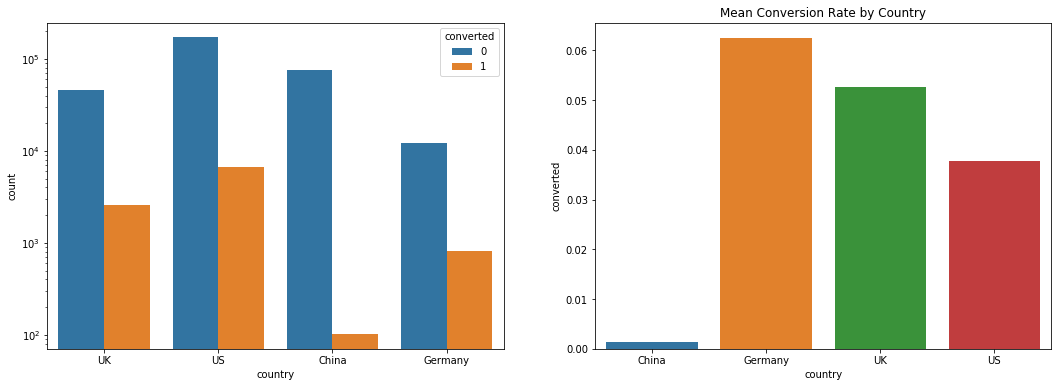

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.countplot(x='country', hue='converted', data=df, ax=ax[0])
ax[0].set_yscale('log')
sns.barplot(x = country.index,y = country.converted, ax=ax[1])
ax[1].set_title('Mean Conversion Rate by Country')
plt.show()

China has the second largest number of users but really low convertion rate, while Germany has the highest conversion rate but with a few users.

#### By New User or Not

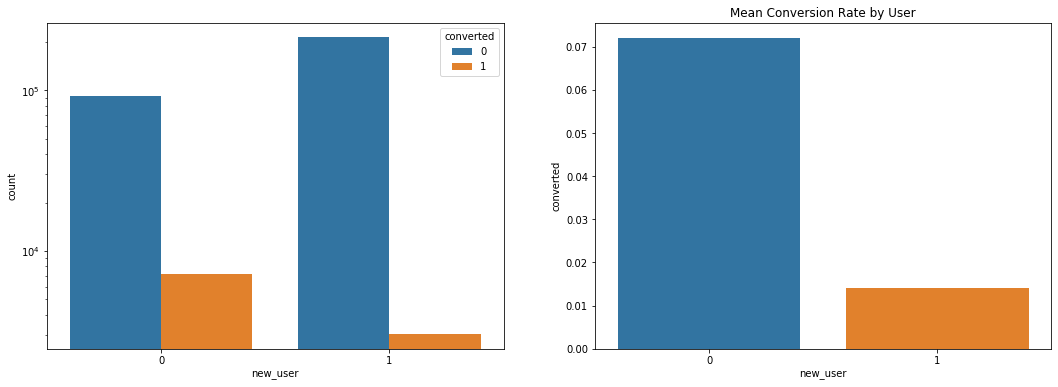

In [10]:
new = df[['new_user','converted']].groupby('new_user').mean()

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.countplot(x='new_user', hue='converted', data=df, ax=ax[0])
ax[0].set_yscale('log')
sns.barplot(x = new.index,y = new.converted, ax=ax[1])
ax[1].set_title('Mean Conversion Rate by User')
plt.show()

There are more new users than old users but less converted from new user. The conversion rate for new user is significantly less than that of old users.

#### By Age

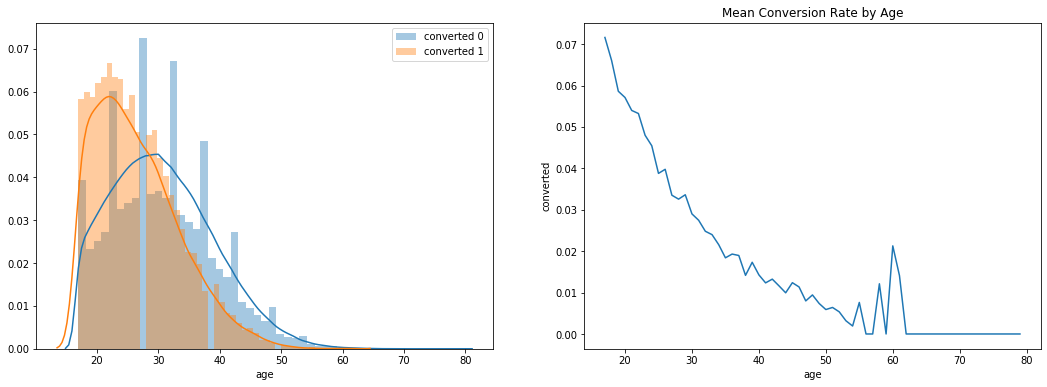

In [11]:
age = df[['age','converted']].groupby('age').mean()

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.distplot(df[df['converted']==0]['age'],ax=ax[0], label = 'converted 0')
sns.distplot(df[df['converted']==1]['age'],ax=ax[0], label = 'converted 1')
ax[0].legend()
sns.lineplot(x = age.index,y = age.converted, ax=ax[1])
ax[1].set_title('Mean Conversion Rate by Age')
plt.show()

Higer mean converted rate for younger users; most of 30s do not convert, and no conversion after 60.

#### By source

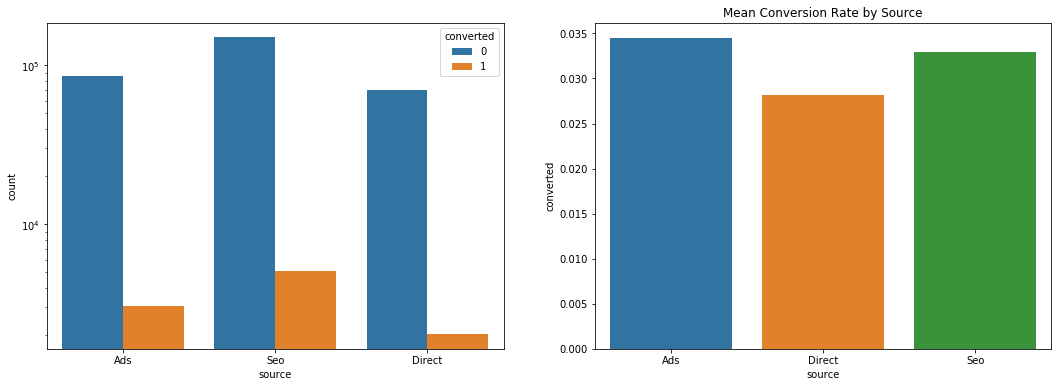

In [12]:
source = df[['source','converted']].groupby('source').mean()

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.countplot(x='source', hue='converted', data=df, ax=ax[0])
ax[0].set_yscale('log')
sns.barplot(x = source.index,y = source.converted, ax=ax[1])
ax[1].set_title('Mean Conversion Rate by Source')
plt.show()

No huge difference among three sources for the conversion rate.

#### By total page visited

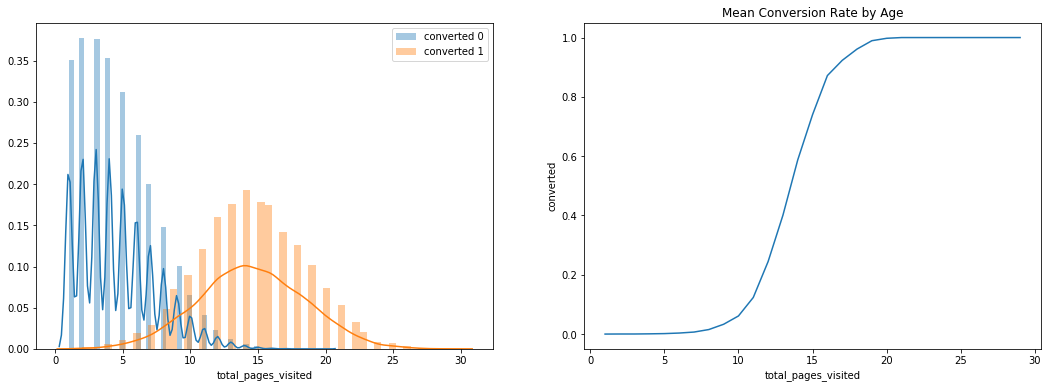

In [13]:
visit = df[['total_pages_visited','converted']].groupby('total_pages_visited').mean()

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.distplot(df[df['converted']==0]['total_pages_visited'],ax=ax[0], label = 'converted 0')
sns.distplot(df[df['converted']==1]['total_pages_visited'],ax=ax[0], label = 'converted 1')
ax[0].legend()
sns.lineplot(x = visit.index,y = visit.converted, ax=ax[1])
ax[1].set_title('Mean Conversion Rate by Age')
plt.show()

More page visit, higher conversion rate.

## Model
### Logistic Regression
This one need the dummy variables

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [15]:
#df2 is the one with dummy variables
df2 = pd.concat([df.iloc[:,:-1], pd.get_dummies(df['source'],prefix='source'),df['converted']],axis=1).\
        drop(['source'],axis=1)
df2 = pd.concat([df2.iloc[:,:-1], pd.get_dummies(df['country'],prefix='country'),df['converted']],axis=1).\
        drop(['country'],axis=1)
df2.head()

,age,new_user,total_pages_visited,source_Ads,source_Direct,source_Seo,country_China,country_Germany,country_UK,country_US,converted
0,25,1,1,1,0,0,0,0,1,0,0
1,23,1,5,0,0,1,0,0,0,1,0
2,28,1,4,0,0,1,0,0,0,1,0
3,39,1,5,0,0,1,1,0,0,0,0
4,30,1,6,0,0,1,0,0,0,1,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.2,
                                                   stratify = df2['converted'])

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[-1.15656335,  0.6769592 ,  0.03664805, ..., -0.20793659,
         2.34936929, -1.13528906],
       [ 0.41519203, -1.47719389,  1.23360328, ..., -0.20793659,
        -0.42564615, -1.13528906],
       [-0.43113779,  0.6769592 , -0.56182956, ..., -0.20793659,
        -0.42564615,  0.88083294],
       ...,
       [-0.67294631,  0.6769592 , -0.56182956, ..., -0.20793659,
        -0.42564615,  0.88083294],
       [-1.39837186, -1.47719389, -0.56182956, ..., -0.20793659,
        -0.42564615, -1.13528906],
       [-1.03565909,  0.6769592 , -1.16030718, ..., -0.20793659,
        -0.42564615,  0.88083294]])

In [19]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
lr.coef_

array([[-0.62877526, -0.80189025,  2.52195239,  0.03247671, -0.04926802,
         0.01221806, -0.98176216,  0.28318138,  0.43259681,  0.41973188]])

Most influncial features are `number visited` and `country_china`, followed by `new users`

In [21]:
pred = lr.predict(X_test)

In [22]:
print(classification_report(y_test,pred))
print(roc_auc_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61200
           1       0.86      0.69      0.77      2040

    accuracy                           0.99     63240
   macro avg       0.92      0.84      0.88     63240
weighted avg       0.99      0.99      0.99     63240

0.8436764705882352


### Random Forest

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
rf.feature_importances_

array([0.11148455, 0.03514588, 0.8181322 , 0.00211001, 0.00199088,
       0.0019288 , 0.01820099, 0.0022636 , 0.00448748, 0.00425562])

Most important features are `total number of visits` and followed by `age`

In [25]:
pred = rf.predict(X_test)
print(classification_report(y_test,pred))
print(roc_auc_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61200
           1       0.82      0.67      0.74      2040

    accuracy                           0.98     63240
   macro avg       0.90      0.83      0.87     63240
weighted avg       0.98      0.98      0.98     63240

0.8337990196078431


In [26]:
ada = AdaBoostClassifier(learning_rate=1.0, n_estimators=100)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [27]:
ada.feature_importances_

array([0.23, 0.01, 0.7 , 0.01, 0.01, 0.  , 0.02, 0.01, 0.  , 0.01])

In [28]:
pred = ada.predict(X_test)
print(classification_report(y_test,pred))
print(roc_auc_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61200
           1       0.85      0.69      0.76      2040

    accuracy                           0.99     63240
   macro avg       0.92      0.84      0.88     63240
weighted avg       0.99      0.99      0.99     63240

0.841111111111111
